Mini Project 2


Investigate Hotel Business using Data Visualization

In [36]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv(r'C:\Users\fajar\OneDrive\Documents\Rakamin Project\Investigate Hotel Business using Data Visualization/hotel_bookings_data.csv')

In [37]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
9470,Resort Hotel,1,128,2018,February,49,3,0,1,2,...,0,No Deposit,NaN,NaN,0,Family,64.0,0,0,Canceled
61211,City Hotel,1,59,2018,February,50,4,2,2,3,...,0,No Deposit,9.0,NaN,0,Personal,119.0,0,1,Canceled
50549,City Hotel,1,13,2018,July,19,4,0,3,2,...,0,No Deposit,9.0,NaN,0,Personal,221.0,0,0,Canceled
80666,City Hotel,0,32,2017,January,47,20,0,2,1,...,0,No Deposit,119.0,NaN,0,Family,73.0,0,0,Check-Out
28753,Resort Hotel,0,18,2018,December,42,11,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,57.5,0,0,Check-Out


In [38]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

Didapat 4 coloumn dengan null yaitu city, agent, company, dan children

Dilakukan pengisian data null

In [39]:
#Children null bisa di anggap menjadi 0
df.children = df.children.fillna(0)
df.children.isnull().sum()

0

In [40]:
#city yang null di anggap Unknown
df.city = df.city.fillna('Unknown')
df.city.isnull().sum()

0

In [41]:
#agent yang null di anggap tidak menggunakan agent jadi di isi 0
df.agent = df.agent.fillna(0)
df.agent.isnull().sum()

0

In [42]:
#company yang null di anggap tidak menggunakan agent jadi di isi 0
df.company = df.company.fillna(0)
df.company.isnull().sum()

0

In [43]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [44]:
df.meal.value_counts()

Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64

Di dapat undefined sebagai value yang bisa di anggap menjadi no meal (incorrect value)

In [45]:
df.meal = df.meal.replace(['Undefined'], 'No Meal')
df.meal.value_counts()

Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: meal, dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

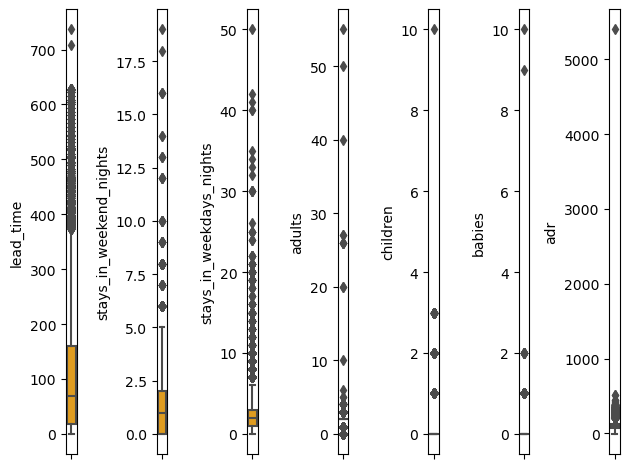

In [47]:
# Creating a boxplot for Outlier detection
features = ['lead_time','stays_in_weekend_nights','stays_in_weekdays_nights', 'adults','children','babies', 'adr' ]
for i in range(0, len(features)):
    plt.subplot(1,len(features), i+1)
    sb.boxplot(y=df[features[i]], color='orange', orient='v')
    plt.tight_layout()

In [48]:
from scipy import stats
filtered_entries = np.array([True] * len(df))

print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

for col in features:
    zscore = abs(stats.zscore(df[col])) # menghitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya

df_clean = df[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier: {len(df_clean)}')
print(f'Prsentase outlier: {round((len(df)-len(df_clean))/len(df)*100, 2)}%')

Jumlah baris sebelum memfilter outlier: 119390
Jumlah baris setelah memfilter outlier: 110137
Prsentase outlier: 7.75%



Menghilangkan data yang tidak perlu dan memproses data

In [49]:
df_clean['visitor'] = df_clean['adults'] + df_clean['children'] + df_clean['babies']
df_clean['stay_duration'] = df_clean['stays_in_weekend_nights'] + df_clean['stays_in_weekdays_nights']

C:\Users\fajar\AppData\Local\Temp\ipykernel_3472\2024128162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['visitor'] = df_clean['adults'] + df_clean['children'] + df_clean['babies']
C:\Users\fajar\AppData\Local\Temp\ipykernel_3472\2024128162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['stay_duration'] = df_clean['stays_in_weekend_nights'] + df_clean['stays_in_weekdays_nights']


In [50]:
#selection data
df_selection = df_clean[df_clean.columns.difference(['adults','children', 'babies', 'stays_in_weekend_nights','stays_in_weekdays_nights'])].reset_index()
df_selection

,index,adr,agent,arrival_date_day_of_month,arrival_date_month,arrival_date_week_number,arrival_date_year,booking_changes,city,company,...,lead_time,market_segment,meal,previous_bookings_not_canceled,previous_cancellations,required_car_parking_spaces,reservation_status,stay_duration,total_of_special_requests,visitor
0,0,0.00,0.0,1,September,27,2017,3,Kota Denpasar,0.0,...,342,Direct,Breakfast,0,0,0,Check-Out,0,0,2.0
1,2,75.00,0.0,1,September,27,2017,0,Kabupaten Bangka,0.0,...,7,Direct,Breakfast,0,0,0,Check-Out,1,0,1.0
2,3,75.00,304.0,1,September,27,2017,0,Kabupaten Bangka,0.0,...,13,Corporate,Breakfast,0,0,0,Check-Out,1,0,1.0
3,4,98.00,240.0,1,September,27,2017,0,Kabupaten Bangka,0.0,...,14,Online TA,Breakfast,0,0,0,Check-Out,2,1,2.0
4,5,98.00,240.0,1,September,27,2017,0,Kabupaten Bangka,0.0,...,14,Online TA,Breakfast,0,0,0,Check-Out,2,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110132,119385,96.14,394.0,30,October,35,2019,0,Kabupaten Magelang,0.0,...,23,Offline TA/TO,Breakfast,0,0,0,Check-Out,7,0,2.0
110133,119386,225.43,9.0,31,October,35,2019,0,Kota Yogyakarta,0.0,...,102,Online TA,Breakfast,0,0,0,Check-Out,7,2,3.0
110134,119387,157.71,9.0,31,October,35,2019,0,Kabupaten Bandung,0.0,...,34,Online TA,Breakfast,0,0,0,Check-Out,7,4,2.0
110135,119388,104.40,89.0,31,October,35,2019,0,Kabupaten Bangka,0.0,...,109,Online TA,Breakfast,0,0,0,Check-Out,7,0,2.0


In [51]:
#Cek outlier


In [52]:
df_clean = df_clean.copy()

In [53]:
df_selection.arrival_date_month.value_counts(normalize=True)

October      0.108256
September    0.101138
July         0.100684
June         0.095817
December     0.095808
August       0.091840
November     0.088753
May          0.083623
April        0.068787
January      0.058391
February     0.056402
March        0.050501
Name: arrival_date_month, dtype: float64

Montly Hotel Booking Analysis Based on Hotel Type (Stage2)


In [54]:
df_hoteltype = df_selection.groupby(['hotel', 'arrival_date_month', 'arrival_date_year'])['visitor'].count().reset_index()

In [55]:
df_hoteltype

,hotel,arrival_date_month,arrival_date_year,visitor
0,City Hotel,April,2018,2271
1,City Hotel,April,2019,2400
2,City Hotel,August,2018,3827
3,City Hotel,August,2019,3742
4,City Hotel,December,2017,3333
5,City Hotel,December,2018,3893
6,City Hotel,February,2017,1582
7,City Hotel,February,2018,2182
8,City Hotel,January,2017,1213
9,City Hotel,January,2018,2929


Text(0.5, 1.0, 'Monthly Hotel Booking Analysis Based on Hotel Type')

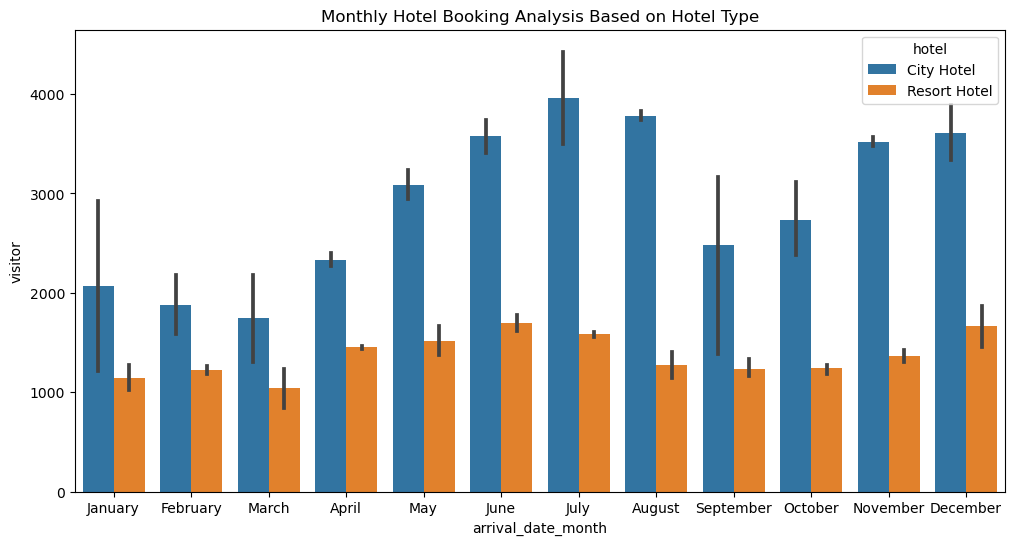

In [56]:
plt.figure(figsize=(12,6))
sb.barplot(data=df_hoteltype, x="arrival_date_month" , y = 'visitor', hue="hotel",
             order = ['January','February', 'March','April','May','June','July','August','September','October','November','December'])
plt.title('Monthly Hotel Booking Analysis Based on Hotel Type')

Dari data di atas dapat di lihat bahwa nilai booking City hotel lebih tinnggi di bandung resort hotel
Untuk data per month pada city hotel bisa di lihat bahwa pada bulan july dan Agustus
Untuk data per month pada Resort Hotel bisa di lihat bahwa pada bulan july dan December

Text(0.5, 1.0, 'Yearly Hotel Booking Analysis Based on Hotel Type')

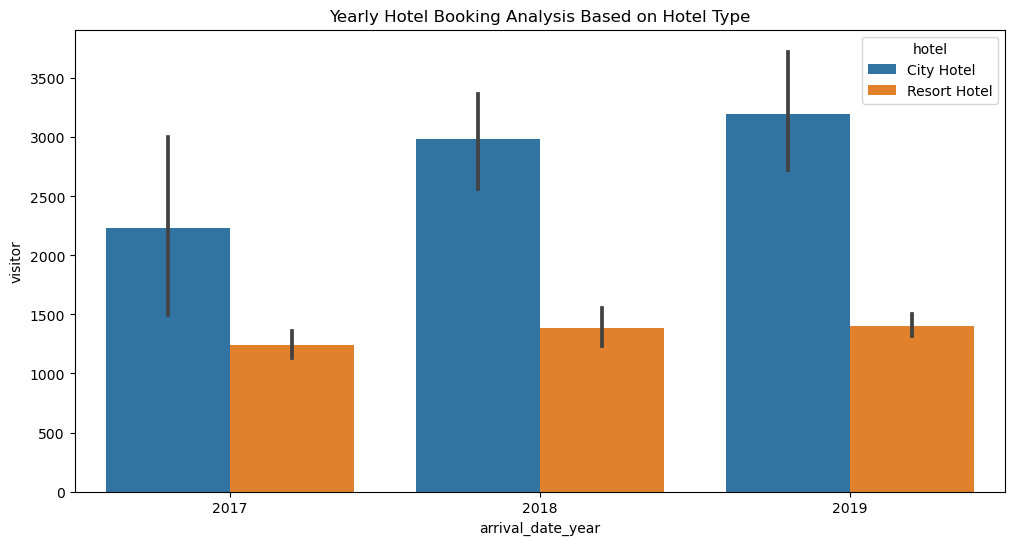

In [57]:
plt.figure(figsize=(12,6))
sb.barplot(data=df_hoteltype, x= 'arrival_date_year' , y = 'visitor', hue="hotel")
plt.title('Yearly Hotel Booking Analysis Based on Hotel Type')

Dari data dapat di lihat bahwa tiap tahunnya terjadi kenaikan, kenaikan yang cukup signifikan dari tahun 2017 ke 2018

Impact Analysis of Stay Duration on Hotel Bookings Cancellation

In [58]:
df_canceled = df_selection.groupby(['is_canceled','hotel'])['stay_duration'].sum().reset_index()

In [59]:
df_canceled

,is_canceled,hotel,stay_duration
0,0,City Hotel,126783
1,0,Resort Hotel,93795
2,1,City Hotel,90849
3,1,Resort Hotel,40042


Text(0.5, 1.0, 'correlation of Stay Duration on Hotel Bookings Cancellation')

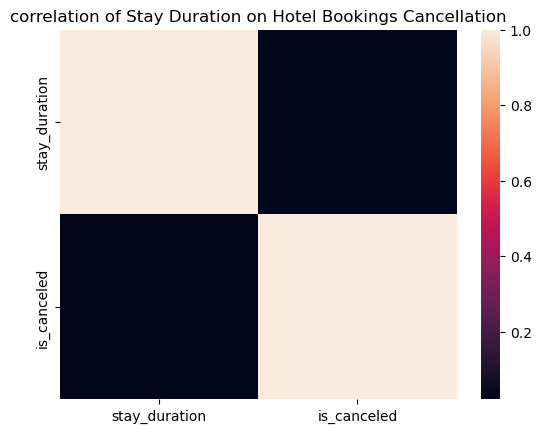

In [60]:
columns=(['stay_duration', 'is_canceled'])
sb.heatmap(df_selection[columns].corr())
plt.title('correlation of Stay Duration on Hotel Bookings Cancellation')

Text(0.5, 1.0, 'Impact Analysis of Stay Duration on Hotel Bookings Cancellation')

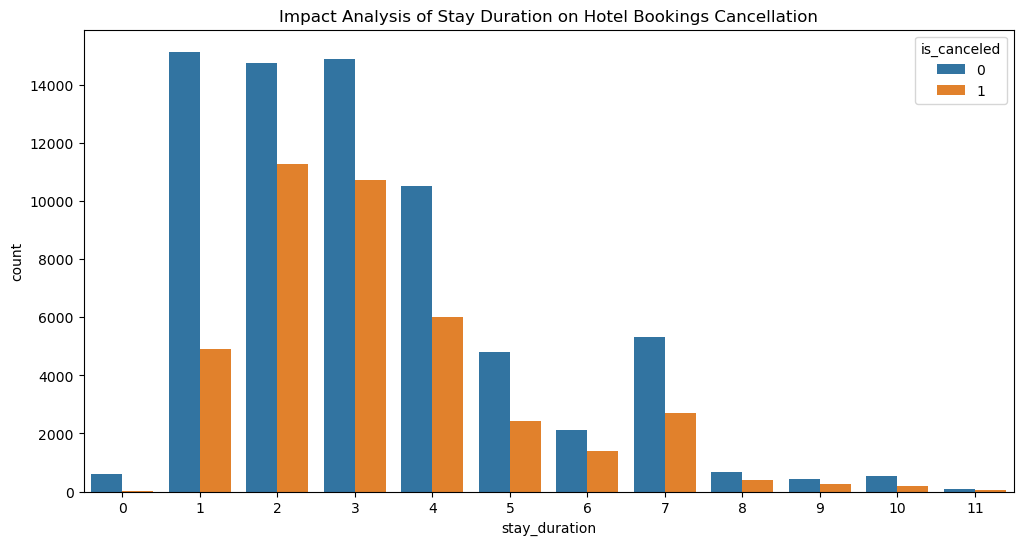

In [61]:
plt.figure(figsize=(12,6))
sb.countplot(data=df_selection, x = 'stay_duration', hue = "is_canceled")
plt.title('Impact Analysis of Stay Duration on Hotel Bookings Cancellation')

Dari data di atas dapat dilihat bahwa tingkat canceled tidak lebih tinggi dibanding not canceled

Tingkat canceled paling tinggi terjadi pada durasi 2-3 stay duration

Text(0.5, 1.0, 'Impact Analysis of Month on Hotel Bookings Cancellation')

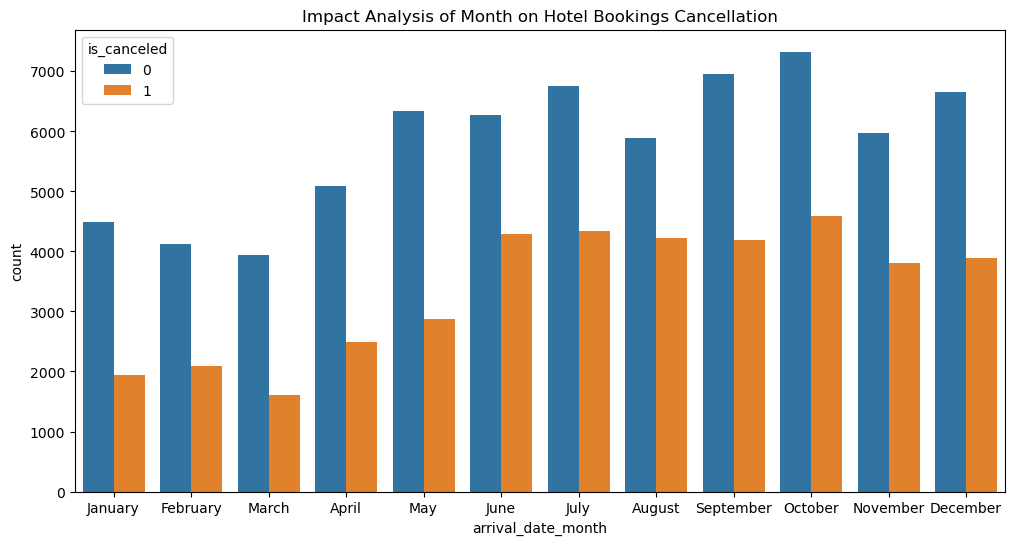

In [62]:
plt.figure(figsize=(12,6))
sb.countplot(data=df_selection, x = 'arrival_date_month', hue = "is_canceled",
             order = ['January','February', 'March','April','May','June','July','August','September','October','November','December'])
plt.title('Impact Analysis of Month on Hotel Bookings Cancellation')

Text(0.5, 1.0, 'Analysis of Hotel Type on Hotel Bookings Cancellation')

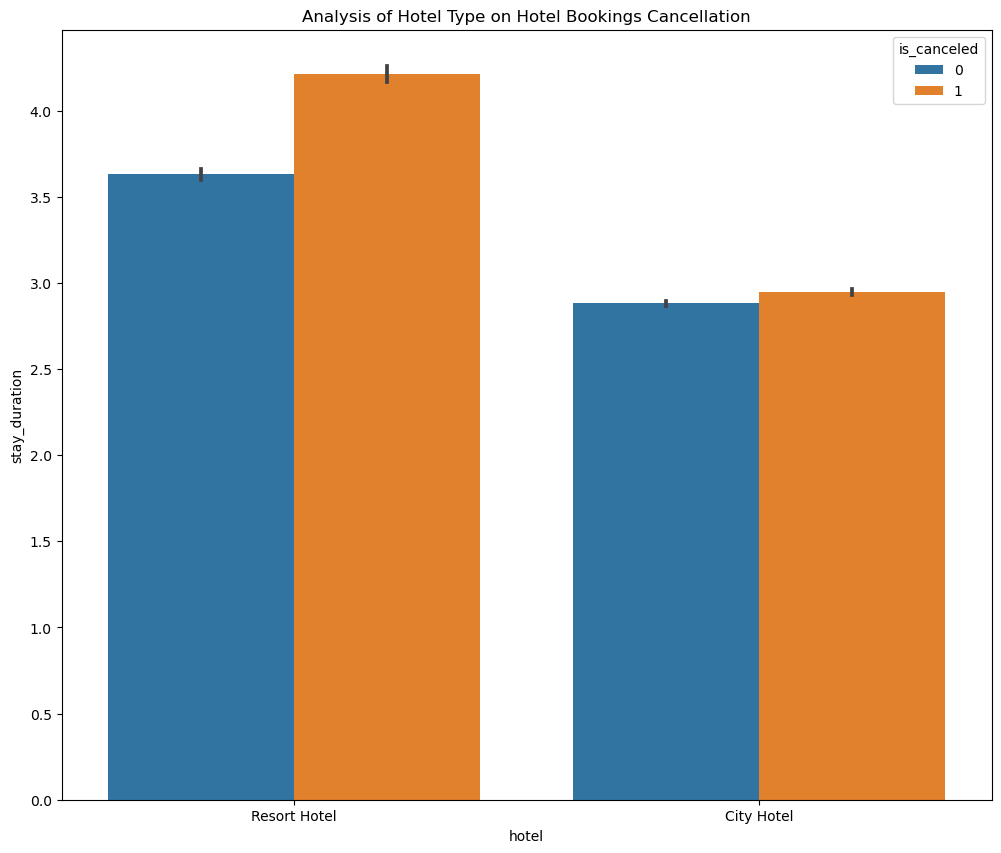

In [63]:
plt.figure(figsize=(12,10))
sb.barplot(data=df_selection, y = 'stay_duration' , x ='hotel' , hue = "is_canceled")
plt.title('Analysis of Hotel Type on Hotel Bookings Cancellation')

Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

Text(0.5, 1.0, 'correlation of Stay Duration on Hotel Bookings Cancellation')

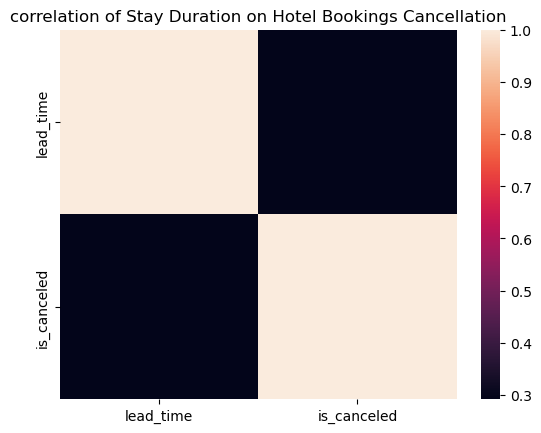

In [64]:
columns=(['lead_time', 'is_canceled'])
sb.heatmap(df_selection[columns].corr())
plt.title('correlation of Stay Duration on Hotel Bookings Cancellation')

Korelasinya lemah

Bentuk hubungan antara dua variabel memiliki bentuk korelasi linear positif 

In [65]:
df_leadtime = df_selection.groupby(['hotel', 'lead_time', 'arrival_date_month'])['is_canceled'].count().reset_index()

In [66]:
df_leadtime

,hotel,lead_time,arrival_date_month,is_canceled
0,City Hotel,0,April,252
1,City Hotel,0,August,224
2,City Hotel,0,December,276
3,City Hotel,0,February,166
4,City Hotel,0,January,152
...,...,...,...,...
6654,Resort Hotel,400,October,1
6655,Resort Hotel,407,October,2
6656,Resort Hotel,411,July,24
6657,Resort Hotel,422,November,1


Text(0.5, 1.0, 'Impact Analysis of Lead Time on Hotel Bookings Cancellation ')

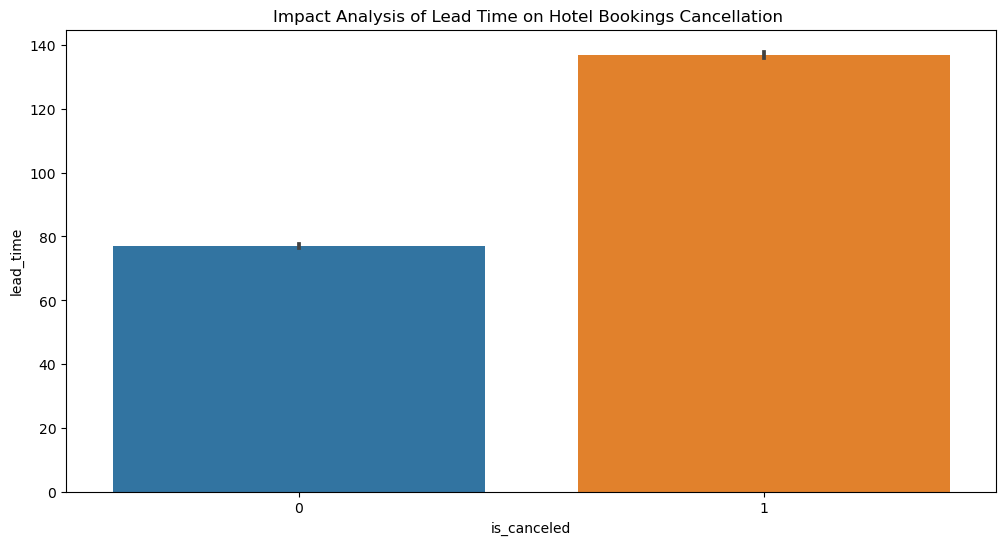

In [67]:
plt.figure(figsize=(12,6))
sb.barplot(data=df_selection, y = 'lead_time' , x = 'is_canceled')
plt.title('Impact Analysis of Lead Time on Hotel Bookings Cancellation ')

Pada Data Impact Analysis of Lead Time on Hotel Bookings Cancellation dapat di lihat bahwa :
1. Tingkan cancel terjad pada lead time di atas 70
2. lama booking hotel pada resort hotel dan city hotel yang not canceled hampir sama dimana lead time paling lama ada di bawah 70 lead time

Text(0.5, 1.0, 'Impact Analysis of Lead Time on Hotel Bookings Cancellation by Hotel Type')

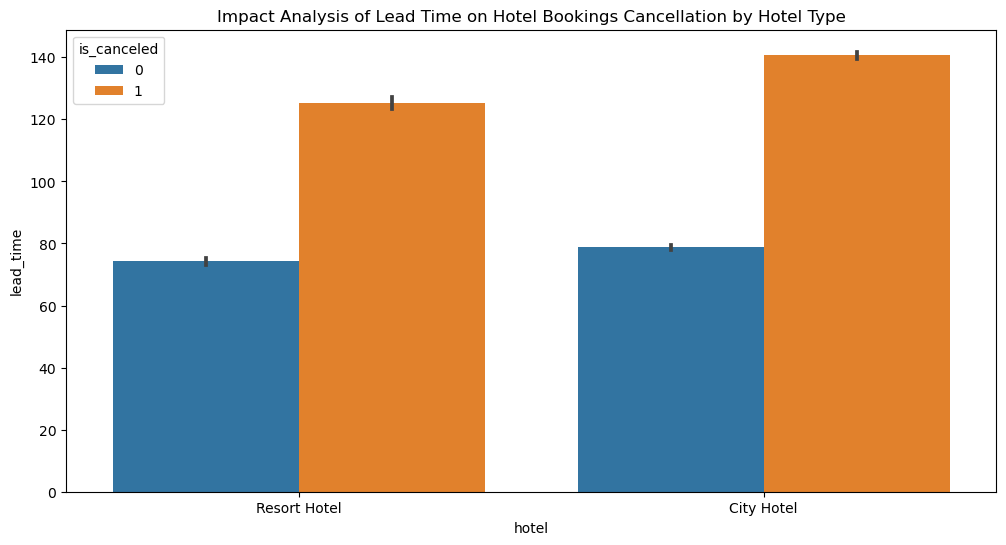

In [68]:
plt.figure(figsize=(12,6))
sb.barplot(data=df_selection, y = 'lead_time' , x = "hotel" , hue = 'is_canceled')
plt.title('Impact Analysis of Lead Time on Hotel Bookings Cancellation by Hotel Type')

Pada Data Impact Analysis of Lead Time on Hotel Bookings Cancellation by Hotel Type dapat di lihat bahwa :
1. Tingkan cancel terjadi pada interval di atas 70 untuk Resort hotel
2. Tingkan cancel terjadi pada interval di atas 80 untuk Resort hotel
3. lama booking hotel pada resort hotel dan city hotel yang not canceled hampir sama dimana lead time paling lama ada di bawah 80 lead time

Text(0.5, 1.0, 'Impact Analysis of Stay Duration on Hotel Bookings Cancellation by Month')

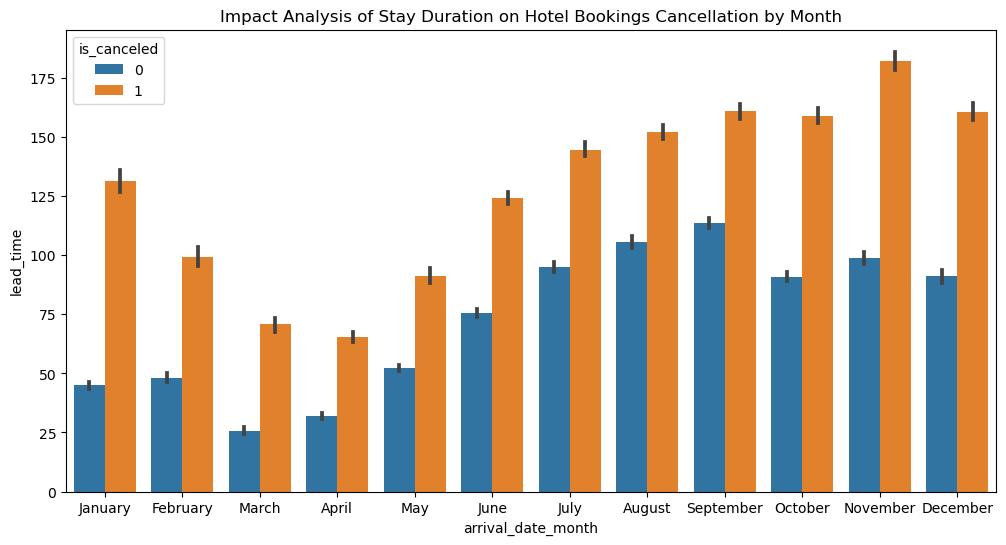

In [69]:
plt.figure(figsize=(12,6))
sb.barplot(data=df_selection, y = 'lead_time' , x = "arrival_date_month" , hue = 'is_canceled', order = ['January','February', 'March','April','May','June','July','August','September','October','November','December'])
plt.title('Impact Analysis of Stay Duration on Hotel Bookings Cancellation by Month')

1. Canceled dangan lead time paling lama terjadi pada bulan November, hal tersebut bisa terjadi karena banya pengunjung yang merencanakan untuk melakukan booking pada bulan December dimana terdapat libur panjang yaitu libur natal dan tahun baru
2. canceled dengan lead time paling singkat terjadi pada bulan April